In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Integration/cleaned_data.csv')
# includes approx 100k jokes with categories 0, 1, 2, 3 : appropriate, dirty, dark, news

In [ ]:
data.head()

,joke_type,score,title,selftext
0,0,39,Sherlock Holmes and Dr Watson were going camping.,They pitched their tent under the stars and we...
1,0,4,"some cheesy ones, but they're some of my favor...",What's a ghost's favorite thing to get at the ...
2,0,12,What kind of horses go out after dark?,Nightmares!
3,0,28,A man in Alaska was feeling lonely...,So he decided to get a puppy. After finding a ...
4,0,13,Where did George Washington keep his armies?,In his sleevies!


In [ ]:
data['joke_type'].value_counts()

,count
joke_type,
1,79230
3,10710
0,7450
2,5473


In [ ]:
# merge title and body tp form jokes
data['joke'] = data['title'] + ' ' + data['selftext']

In [ ]:
data

,joke_type,score,title,selftext,joke
0,0,39,Sherlock Holmes and Dr Watson were going camping.,They pitched their tent under the stars and we...,Sherlock Holmes and Dr Watson were going campi...
1,0,4,"some cheesy ones, but they're some of my favor...",What's a ghost's favorite thing to get at the ...,"some cheesy ones, but they're some of my favor..."
2,0,12,What kind of horses go out after dark?,Nightmares!,What kind of horses go out after dark? Nightma...
3,0,28,A man in Alaska was feeling lonely...,So he decided to get a puppy. After finding a ...,A man in Alaska was feeling lonely... So he de...
4,0,13,Where did George Washington keep his armies?,In his sleevies!,Where did George Washington keep his armies? I...
...,...,...,...,...,...
102858,3,-1,Speculators raise net long dollar bets in fina...,Net long bets on the dollar fell last week for...,Speculators raise net long dollar bets in fina...
102859,3,-1,Wall St. thinks stocks will rise in 2017 - Wha...,Wall Street’s rally could be derailed by rene...,Wall St. thinks stocks will rise in 2017 - Wha...
102860,3,-1,Disney buying Netflix could be practical magic,(Reuters Breakingviews) Walt Disney may be ...,Disney buying Netflix could be practical magic...
102861,3,-1,Actors seek posthumous protections after big-s...,(Story refiled to correct date in paragraph 1...,Actors seek posthumous protections after big-s...


In [ ]:
# Compute joke lengths
data["joke_length"] = data["joke"].str.len()

# Group by joke type and calculate statistics
joke_length_stats = data.groupby("joke_type")["joke_length"].agg(["mean", "std", "max"])

print(joke_length_stats)


                  mean          std      max
joke_type                                   
0           136.579866   200.512031   3401.0
1           113.605792   401.320968  40035.0
2           243.133199   402.824309   7773.0
3          4131.846764  1547.595785  33622.0


In [ ]:
# make classes binary: apprpriate:0 or inappropriate:1
data['joke_type'] = data['joke_type'].replace({3: 0, 2: 1})

In [ ]:
data['joke_type'].value_counts()

,count
joke_type,
1,84703
0,18160


In [ ]:
data.head()

,joke_type,score,title,selftext,joke
0,0,39,Sherlock Holmes and Dr Watson were going camping.,They pitched their tent under the stars and we...,Sherlock Holmes and Dr Watson were going campi...
1,0,4,"some cheesy ones, but they're some of my favor...",What's a ghost's favorite thing to get at the ...,"some cheesy ones, but they're some of my favor..."
2,0,12,What kind of horses go out after dark?,Nightmares!,What kind of horses go out after dark? Nightma...
3,0,28,A man in Alaska was feeling lonely...,So he decided to get a puppy. After finding a ...,A man in Alaska was feeling lonely... So he de...
4,0,13,Where did George Washington keep his armies?,In his sleevies!,Where did George Washington keep his armies? I...


In [ ]:
df = data[['joke', 'joke_type']]

In [ ]:
x = df[df['joke'].isnull()].index
df = df.drop(x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102849 entries, 0 to 102862
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   joke       102849 non-null  object
 1   joke_type  102849 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [1]:
# Calculate the length of each joke
df['joke_length'] = df['joke'].str.len()


# Set up the seaborn style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of joke lengths for each category
sns.boxplot(x='joke_type', y='joke_length', data=df)

# Add labels and title
plt.title('Distribution of Joke Lengths by Category')
plt.xlabel('Joke Category')
plt.ylabel('Joke Length')

# Show the plot
plt.show()


NameError: name 'df' is not defined

## data Splitting

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=42)

# Sadly in this particular time where it actually worked, i forgot to stratify bsed on joke_type

KeyboardInterrupt: 

In [ ]:
# only use 5000 points for GPU to handle
jokes = train['joke'][:5000].values
labels = train['joke_type'][:5000].values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Let's apply the tokenizer to one sentence just to see the output.


In [ ]:
# Print the original sentence.
print(' Original: ', jokes[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(jokes[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(jokes[0])))

 Original:  Why is my uncle and my school so similar? It takes 5 hours for me to be able to get out of them
Tokenized:  ['why', 'is', 'my', 'uncle', 'and', 'my', 'school', 'so', 'similar', '?', 'it', 'takes', '5', 'hours', 'for', 'me', 'to', 'be', 'able', 'to', 'get', 'out', 'of', 'them']
Token IDs:  [2339, 2003, 2026, 4470, 1998, 2026, 2082, 2061, 2714, 1029, 2009, 3138, 1019, 2847, 2005, 2033, 2000, 2022, 2583, 2000, 2131, 2041, 1997, 2068]


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for joke in jokes:
    encoded_joke = tokenizer.encode(
                        joke,
                        add_special_tokens = True,
                        truncation = True,
                        padding='max_length',
                        max_length = 512,
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_joke)

# Print sentence 0
print('Original: ', jokes[0])
print('Token IDs:', input_ids[0])

Original:  Why is my uncle and my school so similar? It takes 5 hours for me to be able to get out of them
Token IDs: [101, 2339, 2003, 2026, 4470, 1998, 2026, 2082, 2061, 2714, 1029, 2009, 3138, 1019, 2847, 2005, 2033, 2000, 2022, 2583, 2000, 2131, 2041, 1997, 2068, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# Create attention masks
attention_masks = []

for joke in input_ids:

    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in joke]

    attention_masks.append(att_mask)

In [ ]:
attention_masks[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=42, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
# create iterator

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32 #16

# Create the DataLoader for training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2, # binary
    output_attentions = False,
    output_hidden_states = False,
)

# run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 5e-5
                  eps = 1e-8
                )


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Dynamic Learning Rate
from transformers import get_linear_schedule_with_warmup

epochs = 2

total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

Define a helper function for calculating accuracy.

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Helper function for formatting elapsed times.


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


## Training

In [ ]:
# Training

import random

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch
loss_values = []

for epoch_i in range(0, epochs):


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from dataloader.

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # clear any previously calculated gradients
        model.zero_grad()

        # get loss
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)


        loss = outputs[0]

        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))



    # Validation

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.

            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)


        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    141.    Elapsed: 0:01:47.
  Batch    80  of    141.    Elapsed: 0:03:37.
  Batch   120  of    141.    Elapsed: 0:05:28.

  Average training loss: 0.23
  Training epcoh took: 0:06:25

Running Validation...
  Accuracy: 0.92
  Validation took: 0:00:14

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    141.    Elapsed: 0:01:50.
  Batch    80  of    141.    Elapsed: 0:03:41.
  Batch   120  of    141.    Elapsed: 0:05:31.

  Average training loss: 0.10
  Training epcoh took: 0:06:28

Running Validation...
  Accuracy: 0.93
  Validation took: 0:00:14

Training complete!


Let's take a look at our training loss over all batches:

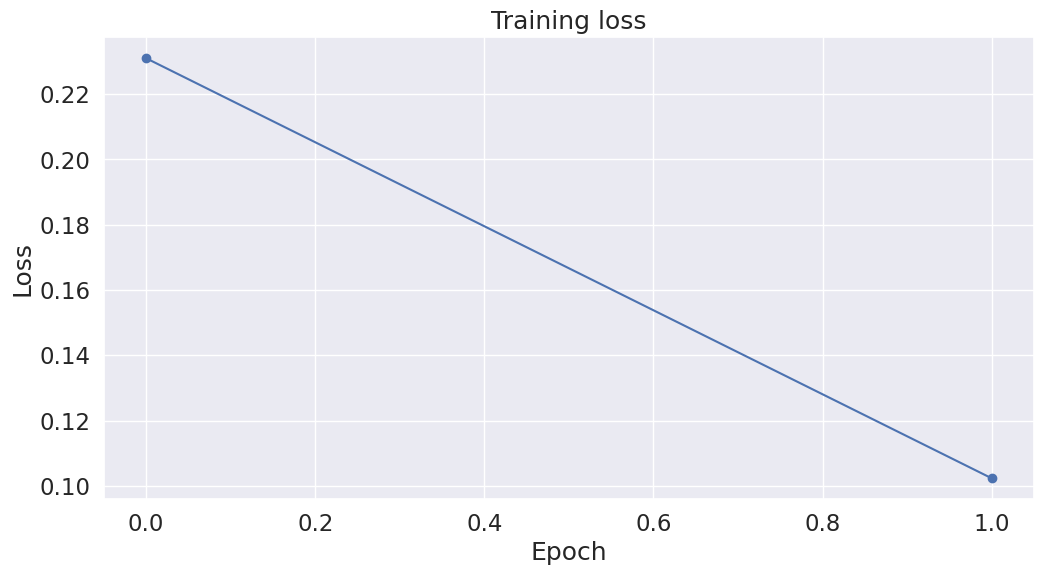

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
jokes = test['joke'].values
joke_type = test['joke_type'].values

input_ids = []
for joke in jokes:
    encoded_joke = tokenizer.encode(
        joke,
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        max_length=512,
    )
    input_ids.append(encoded_joke)

attention_masks = []
for seq in input_ids:
    seq_mask = [float(i > 0) for i in seq]
    attention_masks.append(seq_mask)

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(joke_type)

batch_size = 32

prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('DONE')

Predicting labels for 10,285 test sentences...
    DONE.


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
matthews_set

[0.9078412990032037,
 0.5259259259259259,
 1.0,
 0.8509629433967631,
 0.632183908045977,
 0.52678658400752,
 0.632183908045977,
 0.5447047794019222,
 0.5584155773160767,
 0.7948717948717948,
 0.7419408268023742,
 0.8509629433967631,
 1.0,
 0.4521365014259176,
 0.647150228929434,
 0.6180700462007377,
 0.6753002216523571,
 0.8783100656536799,
 0.8459051693633014,
 0.5259259259259259,
 0.9229582069908973,
 0.7141684885491869,
 0.5584155773160767,
 0.6180700462007377,
 1.0,
 0.9078412990032037,
 0.9165151389911681,
 0.8333333333333334,
 0.7474093186836597,
 0.35986374603287324,
 0.7141684885491869,
 1.0,
 1.0,
 0.8958064164776167,
 0.6666666666666666,
 0.8132500607904443,
 0.7948717948717948,
 0.8783100656536799,
 0.6831300510639733,
 0.8027729719194864,
 0.6831300510639733,
 0.7474093186836597,
 0.7474093186836597,
 0.6831300510639733,
 0.6078306738548308,
 0.9165151389911681,
 0.8509629433967631,
 0.42857142857142855,
 0.8333333333333334,
 0.7867957924694432,
 0.9229582069908973,
 0.4521

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.777


## Testing on Jester Dataset

In [ ]:
jester = pd.read_csv('/content/drive/MyDrive/Data Integration/jester_items.csv')
jester.head()
jester = jester.jokeText.values

            Length
count   150.000000
mean    379.613333
std     286.383298
min      52.000000
25%     136.000000
50%     318.500000
75%     538.500000
max    1326.000000


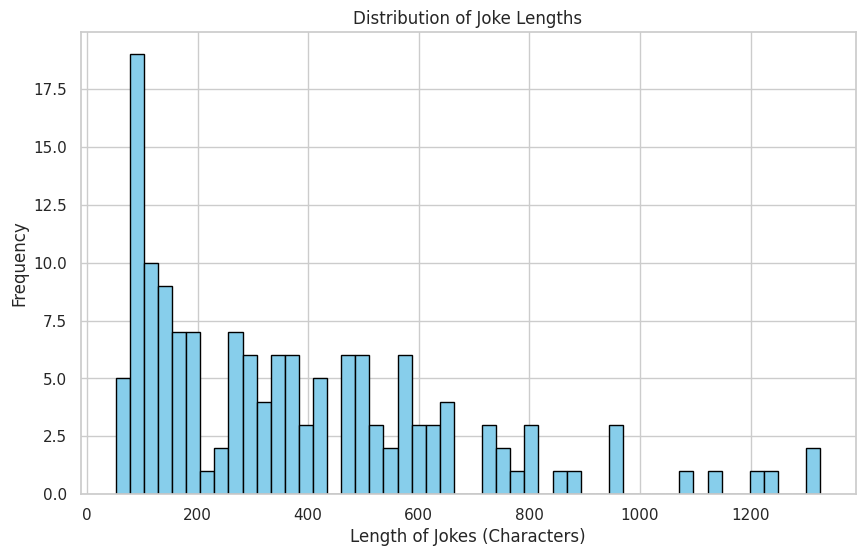

In [ ]:
# Calculate the length of each joke in characters
joke_lengths = [len(joke) for joke in jester]

joke_lengths_df = pd.DataFrame(joke_lengths, columns=["Length"])

# Display basic statistics
print(joke_lengths_df.describe())

# Plot the lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(joke_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Joke Lengths")
plt.xlabel("Length of Jokes (Characters)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Prepare Jester Dataset (150)

input_ids = []
for joke in jester:
    encoded_joke = tokenizer.encode(
        joke,
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        max_length=512,
    )
    input_ids.append(encoded_joke)

attention_masks = []
for seq in input_ids:
    seq_mask = [float(i > 0) for i in seq]
    attention_masks.append(seq_mask)

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)

batch_size = 32

prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


In [ ]:
# Put model in evaluation mode
model.eval()

predictions = []

with torch.no_grad():
    for batch in prediction_dataloader:
        batch = tuple(t.to(device) for t in batch)  # Move to GPU if available
        inputs = {"input_ids": batch[0], "attention_mask": batch[1]}

        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        predictions.extend(preds)

# Save predictions to DataFrame
predicted_label = predictions


In [ ]:
predicted_label
# we already know the results of this one, and it should only contain only 14 1(s). So it's obviously biased

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [ ]:
# save model

import os

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)



Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

To save your model across Colab Notebook sessions, download it to your local machine, or ideally copy it to your Google Drive.

In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
    drive.mount('/content/drive')

In [ ]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "/content/drive/MyDrive/Data Integration"